Programmer : Phatchara Thaiyanant   66102010177

Date 23 Febuary 2025


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shreenidhihipparagi/google-stock-prediction")

print("Path to dataset files:", path)

100%|██████████| 29.3k/29.3k [00:00<00:00, 10.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shreenidhihipparagi/google-stock-prediction/versions/2


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error


df = pd.read_csv('/root/.cache/kagglehub/datasets/shreenidhihipparagi/google-stock-prediction/versions/2/GOOG.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [23]:
df.isna().sum()

,0
symbol,0
date,0
close,0
high,0
low,0
open,0
volume,0
adjClose,0
adjHigh,0
adjLow,0


In [8]:
df.shape

(1258, 14)

In [61]:
selected_df = df.iloc[:,1:3]
selected_df.head()

,date,close
0,2016-06-14 00:00:00+00:00,718.27
1,2016-06-15 00:00:00+00:00,718.92
2,2016-06-16 00:00:00+00:00,710.36
3,2016-06-17 00:00:00+00:00,691.72
4,2016-06-20 00:00:00+00:00,693.71


In [62]:
selected_df['date'] = pd.to_datetime(selected_df['date'])
selected_df.set_index("date",inplace=True)
selected_df.head()


,close
date,
2016-06-14 00:00:00+00:00,718.27
2016-06-15 00:00:00+00:00,718.92
2016-06-16 00:00:00+00:00,710.36
2016-06-17 00:00:00+00:00,691.72
2016-06-20 00:00:00+00:00,693.71


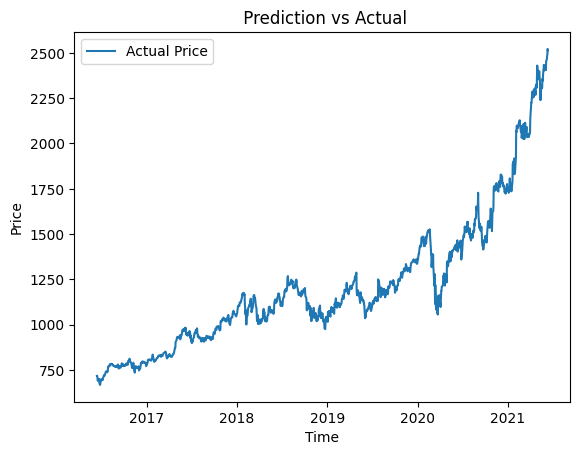

<Figure size 1000x500 with 0 Axes>

In [63]:
plt.plot(selected_df['close'], label='Actual Price')
plt.legend()
plt.title(" Prediction vs Actual")
plt.xlabel("Time")
plt.ylabel("Price")
plt.figure(figsize=(10,5))
plt.show()


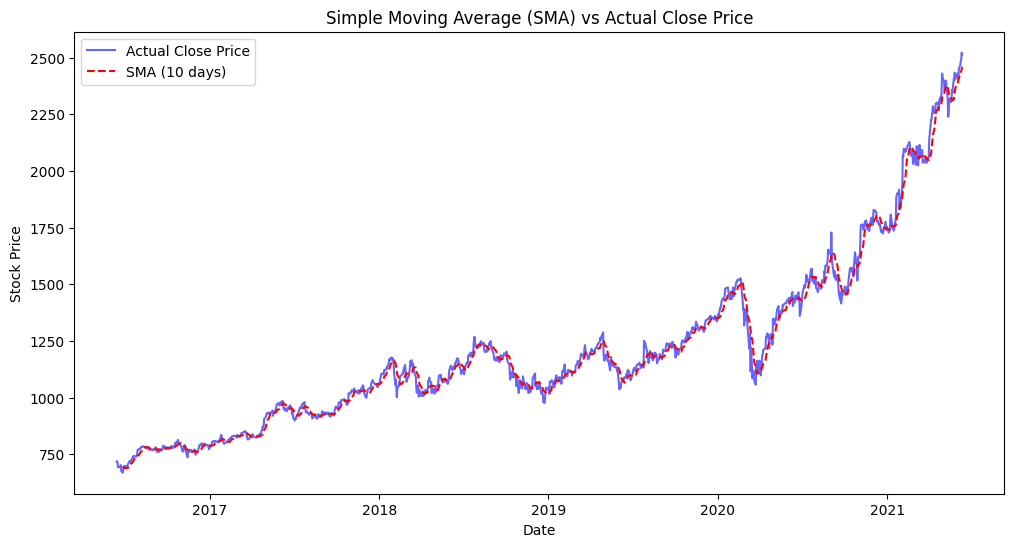

In [64]:
window_size = 10
df_close["SMA"] = df_close["close"].rolling(window=window_size).mean()


plt.figure(figsize=(12, 6))
plt.plot(df_close["close"], label="Actual Close Price", color="blue", alpha=0.6)
plt.plot(df_close["SMA"], label=f"SMA ({window_size} days)", linestyle="dashed", color="red")
plt.legend()
plt.title("Simple Moving Average (SMA) vs Actual Close Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

,date,close
0,2016-06-14 00:00:00+00:00,718.27
1,2016-06-15 00:00:00+00:00,718.92
2,2016-06-16 00:00:00+00:00,710.36
3,2016-06-17 00:00:00+00:00,691.72
4,2016-06-20 00:00:00+00:00,693.71


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


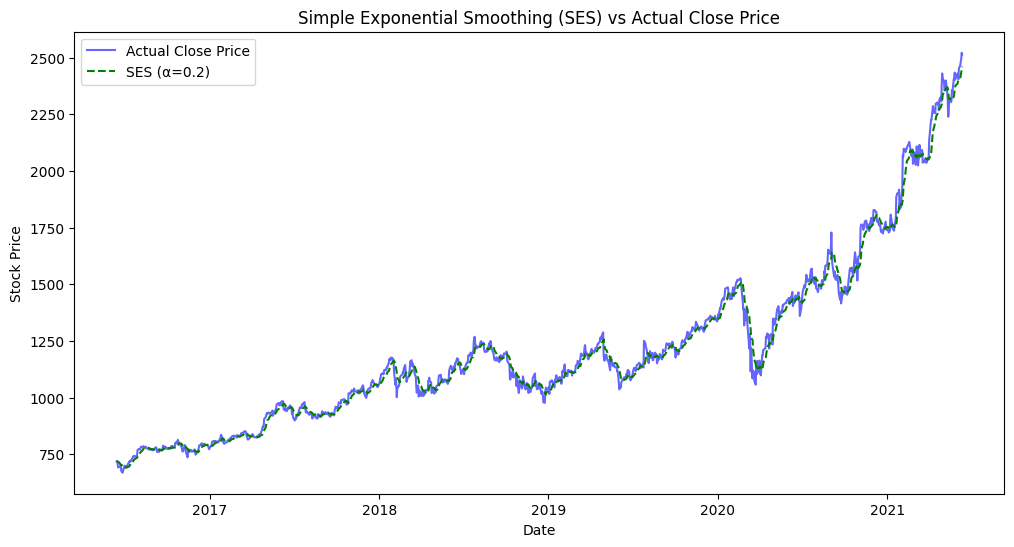

In [65]:
alpha = 0.2
ses_model = SimpleExpSmoothing(df_close["close"]).fit(smoothing_level=alpha, optimized=False)
df_close["SES"] = ses_model.fittedvalues
plt.figure(figsize=(12, 6))
plt.plot(df_close["close"], label="Actual Close Price", color="blue", alpha=0.6)
plt.plot(df_close["SES"], label=f"SES (α={alpha})", linestyle="dashed", color="green")
plt.legend()
plt.title("Simple Exponential Smoothing (SES) vs Actual Close Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


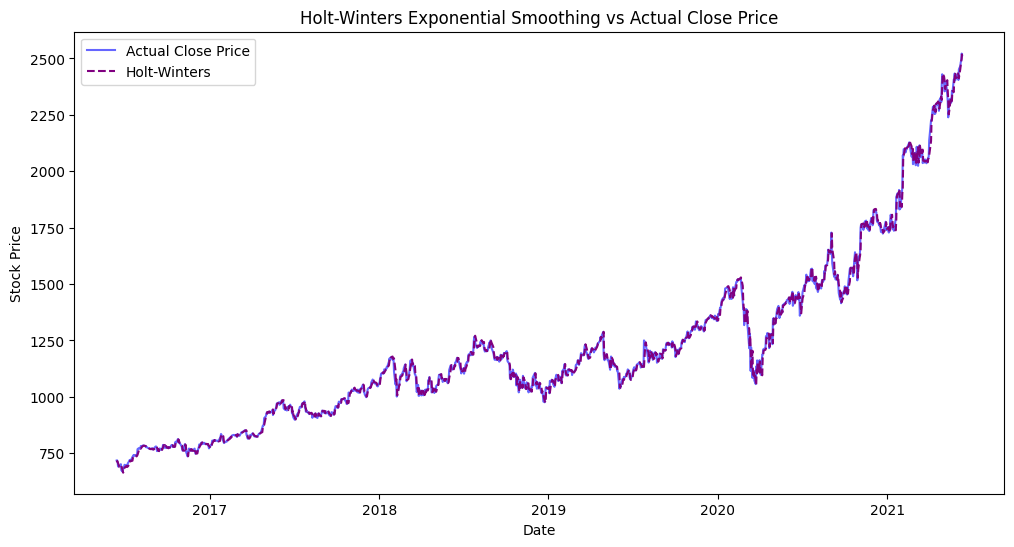

In [66]:
hw_model = ExponentialSmoothing(df_close["close"], trend="add", seasonal=None).fit()
df_close["Holt_Winters"] = hw_model.fittedvalues
plt.figure(figsize=(12, 6))
plt.plot(df_close["close"], label="Actual Close Price", color="blue", alpha=0.6)
plt.plot(df_close["Holt_Winters"], label="Holt-Winters", linestyle="dashed", color="purple")
plt.legend()
plt.title("Holt-Winters Exponential Smoothing vs Actual Close Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

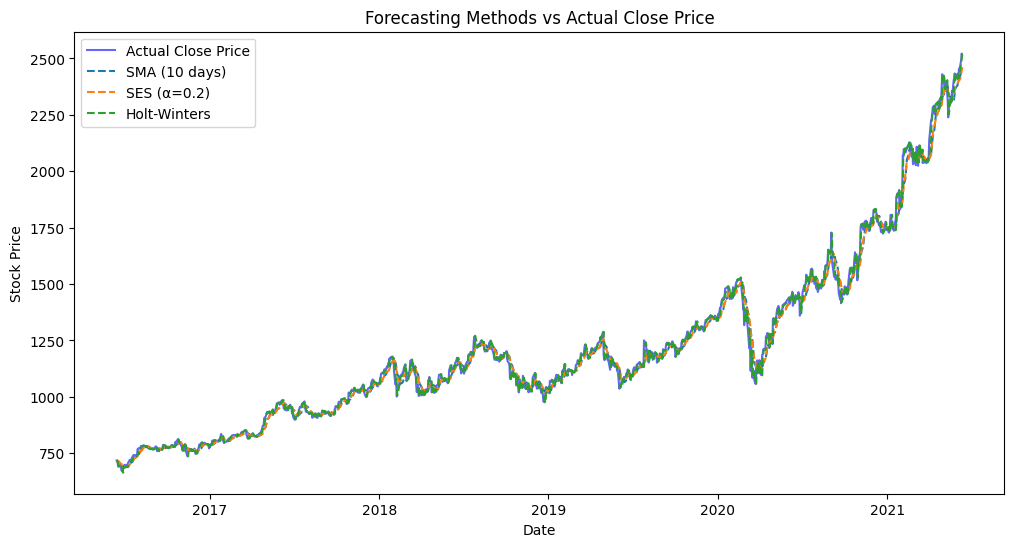

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(df_close["close"], label="Actual Close Price", color="blue", alpha=0.6)
plt.plot(df_close["SMA"], label=f"SMA ({window_size} days)", linestyle="dashed")
plt.plot(df_close["SES"], label=f"SES (α={alpha})", linestyle="dashed")
plt.plot(df_close["Holt_Winters"], label="Holt-Winters", linestyle="dashed")
plt.legend()
plt.title("Forecasting Methods vs Actual Close Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

In [70]:
def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, mse, rmse, mape

metrics = {}
for method in ["SMA", "SES", "Holt_Winters"]:
    valid_idx = df_close[method].dropna().index
    mae, mse, rmse, mape = calculate_metrics(df_close.loc[valid_idx, "close"], df_close.loc[valid_idx, method])
    metrics[method] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "MAPE": mape}



In [71]:
metrics_df = pd.DataFrame(metrics).T
print(metrics_df)


                    MAE          MSE       RMSE      MAPE
SMA           24.415353  1207.906013  34.754942  1.934033
SES           24.182762  1200.417128  34.647036  1.911924
Holt_Winters  14.263453   488.432923  22.100519  1.141896


Summarize
MAE (Mean Absolute Error): ค่าต่ำสุดหมายถึงโมเดลมีค่าคาดเคลื่อนเฉลี่ยต่ำที่สุด


MSE (Mean Squared Error) และ RMSE (Root Mean Squared Error): ค่าต่ำสุดหมายถึงโมเดลสามารถทำนายได้ใกล้เคียงกับค่าจริงมากที่สุด


MAPE (Mean Absolute Percentage Error): ค่าต่ำสุดหมายถึงโมเดลมีเปอร์เซ็นต์ความผิดพลาดเฉลี่ยต่ำที่สุด

ดังนั้น Holt-Winters Exponential Smoothing เป็นโมเดลที่ดีที่สุด เนื่องจากมีค่าความผิดพลาดต่ำที่สุด

MAE = 14.26

MSE = 488.43

RMSE = 22.10

MAPE = 1.14%